In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

# Chargement des fichiers

In [4]:
directory = 'C:/Users/RAMBAUD/Desktop/Python/testJupyter/dataset/atp_2000_2017/'

dfs = []
cols = [
    'tourney_id', # Id of Tournament
    'tourney_name', # Name of the Tournament
    'surface', # Surface of the Court (Hard, Clay, Grass)
    'draw_size', # Number of people in the tournament
    'tourney_level', # Level of the tournament (A=ATP Tour, D=Davis Cup, G=Grand Slam, M=Masters)
    'tourney_date', # Start date of tournament
    'match_num', # Match number
    'winner_id', # Id of winner
    'winner_seed', # Seed of winner
    'winner_entry', # How the winner entered the tournament
    'winner_name', # Name of winner
    'winner_hand', # Dominant hand of winner (L=Left, R=Right, U=Unknown?)
    'winner_ht', # Height in cm of winner
    'winner_ioc', # Country of winner
    'winner_age', # Age of winner
    'winner_rank', # Rank of winner
    'winner_rank_points', # Rank points of winner
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score', # Score
    'best_of', # Best of X number of sets
    'round', # Round
    'minutes', # Match length in minutes
    'w_ace', # Number of aces for winner
    'w_df', # Number of double faults for winner
    'w_svpt', # Number of service points played by winner
    'w_1stIn', # Number of first serves in for winner
    'w_1stWon', # Number of first serve points won for winner
    'w_2ndWon', # Number of second serve points won for winner
    'w_SvGms', # Number of service games played by winner
    'w_bpSaved', # Number of break points saved by winner
    'w_bpFaced', # Number of break points faced by winner
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

for file in os.listdir(directory):
     if file.endswith('.csv'):  # Filter by extension if necessary
        file_path = os.path.join(directory, file) # Combine directory path + file name to get full path
        df = pd.read_csv(file_path, usecols = cols)
        dfs.append(df)
        
df_combined = pd.concat(dfs, ignore_index=True) # Concatenate all df into one
df_combined.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
53566,2017-M-DC-2017-WG-M-RUS-SRB-01,Davis Cup WG R1: RUS vs SRB,Hard,4.0,D,20170203.0,5.0,106421.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53567,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,1.0,106058.0,NaN,NaN,...,4.0,4.0,5.0,82.0,52.0,38.0,9.0,13.0,7.0,12.0
53568,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,2.0,104545.0,NaN,NaN,...,9.0,7.0,9.0,113.0,76.0,53.0,17.0,19.0,7.0,11.0
53569,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,4.0,105023.0,NaN,NaN,...,0.0,3.0,2.0,76.0,42.0,30.0,14.0,10.0,8.0,10.0
53570,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,5.0,105449.0,NaN,NaN,...,4.0,1.0,2.0,54.0,27.0,15.0,15.0,9.0,2.0,6.0


In [21]:
# Date reformatting
df_combined['tourney_date'] = pd.to_datetime(df_combined['tourney_date'], format='%Y%m%d')
df_combined['year'] = df_combined['tourney_date'].dt.year

#federer = df_combined.loc[(df_combined['winner_name'] == 'Roger Federer') | (df_combined['loser_name'] == 'Roger Federer')].copy()
#nadal = df_combined.loc[(df_combined['winner_name'] == 'Rafael Nadal') | (df_combined['loser_name'] == 'Rafael Nadal')].copy()
#djokovic = df_combined.loc[(df_combined['winner_name'] == 'Novak Djokovic') | (df_combined['loser_name'] == 'Novak Djokovic')].copy()

# Overall performance

In [22]:
#Federer's wins and losses
federer_win = df_combined.loc[(df_combined['winner_name'] == 'Roger Federer')].copy()
federer_lose = df_combined.loc[(df_combined['loser_name'] == 'Roger Federer')].copy()

#Nadal's wins and losses
nadal_win = df_combined.loc[(df_combined['winner_name'] == 'Rafael Nadal')].copy()
nadal_lose = df_combined.loc[(df_combined['loser_name'] == 'Rafael Nadal')].copy()

#Djokovic's wins and losses
djokovic_win = df_combined.loc[(df_combined['winner_name'] == 'Novak Djokovic')].copy()
djokovic_lose = df_combined.loc[(df_combined['loser_name'] == 'Novak Djokovic')].copy()


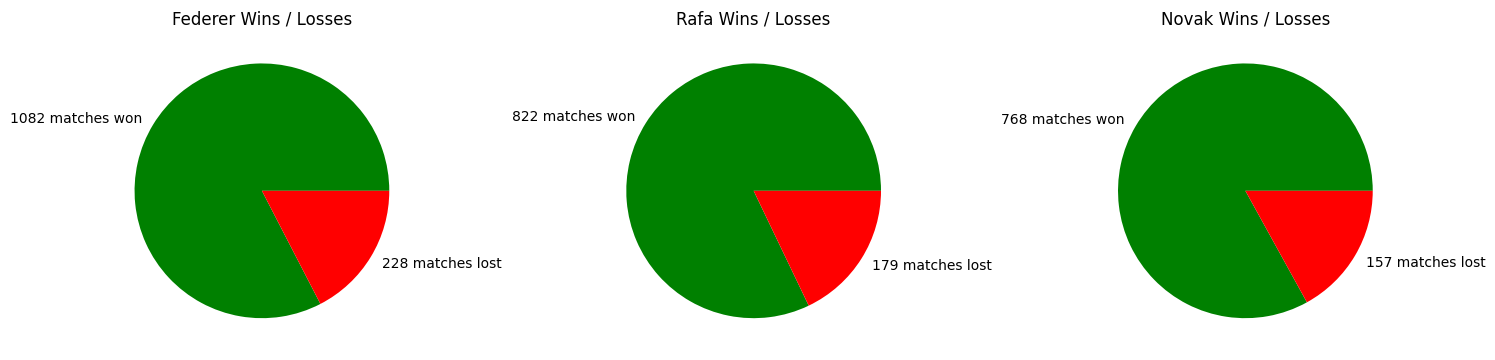

In [23]:
fig = plt.figure(figsize=(15, 5))

# Graphique 1
ax1 = fig.add_subplot(131)
ax1.set_title("Federer Wins / Losses")
ax1.pie([federer_win.count()[0], federer_lose.count()[0]],
        labels=[f'{federer_win.count()[0]} matches won', f'{federer_lose.count()[0]} matches lost'],
        textprops={'fontsize': 10},
        colors = ['green','red'])

# Graphique 2
ax2 = fig.add_subplot(132)
ax2.set_title("Rafa Wins / Losses")
ax2.pie([nadal_win.count()[0], nadal_lose.count()[0]],
        labels=[f'{nadal_win.count()[0]} matches won', f'{nadal_lose.count()[0]} matches lost'],
        textprops={'fontsize': 10},
        colors = ['green','red'])

# Graphique 3
ax3 = fig.add_subplot(133)
ax3.set_title("Novak Wins / Losses")
ax3.pie([djokovic_win.count()[0], djokovic_lose.count()[0]],
        labels=[f'{djokovic_win.count()[0]} matches won', f'{djokovic_lose.count()[0]} matches lost'],
        textprops={'fontsize': 10},
        colors = ['green','red'])

# Display adjustments
plt.tight_layout()

# Figure display
plt.show()

## Win / Loss each year

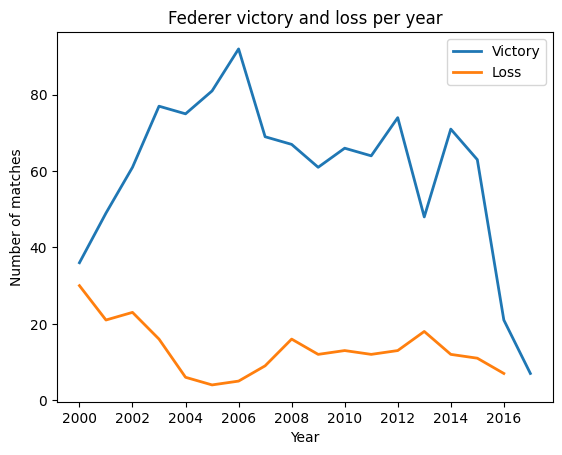

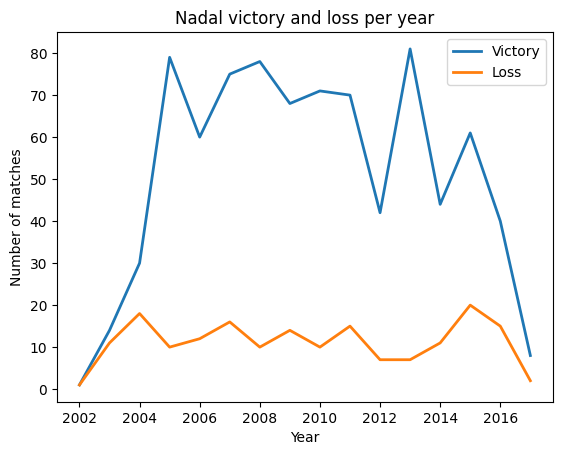

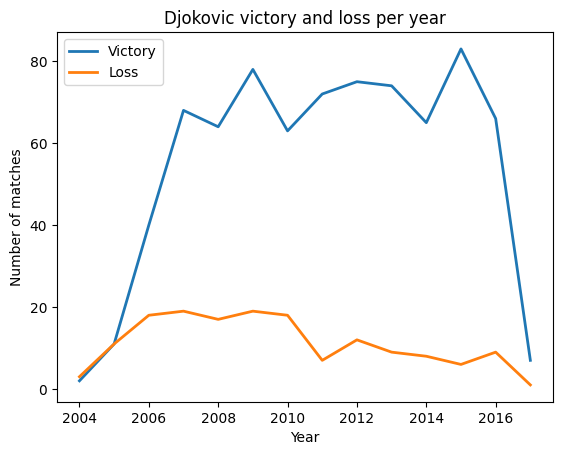

In [24]:
#Federer win / loss per year
federer_victory_per_year = federer_win.groupby('year').size()
federer_loss_per_year = federer_lose.groupby('year').size()


#Nadal win / loss per year
nadal_victory_per_year = nadal_win.groupby('year').size()
nadal_loss_per_year = nadal_lose.groupby('year').size()

#Djokovic win / loss per year
djokovic_victory_per_year = djokovic_win.groupby('year').size()
djokovic_loss_per_year = djokovic_lose.groupby('year').size()

#Federer plot
fig, ax = plt.subplots()

ax.plot(federer_victory_per_year.index, federer_victory_per_year.values, linewidth=2.0, label = 'Victory')
ax.plot(federer_loss_per_year.index, federer_loss_per_year.values, linewidth=2.0, label = 'Loss')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('Number of matches')
ax.set_title('Federer victory and loss per year')

plt.legend()
plt.show()

#Nadal plot
fig, ax = plt.subplots()

ax.plot(nadal_victory_per_year.index, nadal_victory_per_year.values, linewidth=2.0, label = 'Victory')
ax.plot(nadal_loss_per_year.index, nadal_loss_per_year.values, linewidth=2.0, label = 'Loss')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('Number of matches')
ax.set_title('Nadal victory and loss per year')

plt.legend()
plt.show()

#Djoko plot
fig, ax = plt.subplots()

ax.plot(djokovic_victory_per_year.index, djokovic_victory_per_year.values, linewidth=2.0, label = 'Victory')
ax.plot(djokovic_loss_per_year.index, djokovic_loss_per_year.values, linewidth=2.0, label = 'Loss')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('Number of matches')
ax.set_title('Djokovic victory and loss per year')

plt.legend()
plt.show()

## Win in each surface

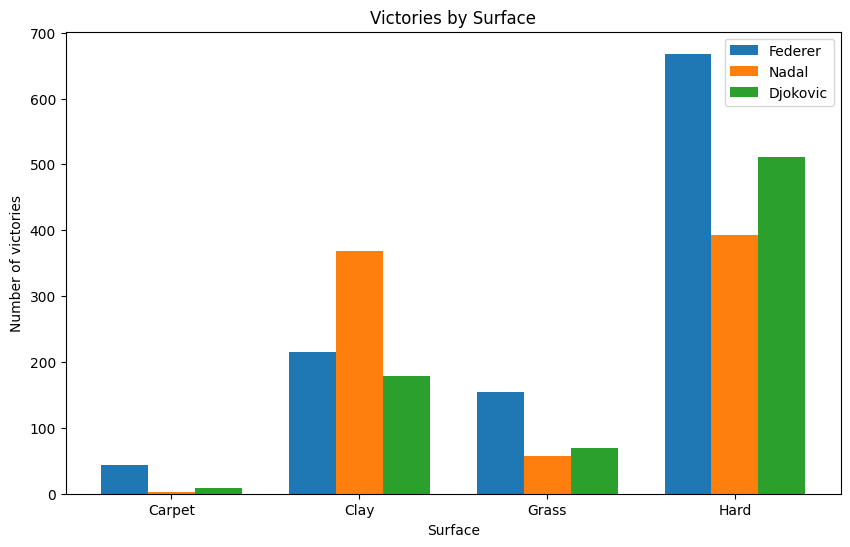

In [25]:
victory_per_surface_federer = federer_win.groupby('surface').size()
victory_per_surface_nadal = nadal_win.groupby('surface').size()
victory_per_surface_djokovic = djokovic_win.groupby('surface').size()


# Concatenate 3 df into one
all_victory_per_surface = pd.concat([victory_per_surface_federer, victory_per_surface_nadal, victory_per_surface_djokovic], axis=1)
all_victory_per_surface.columns = ['Federer', 'Nadal', 'Djokovic']


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

index = np.arange(len(all_victory_per_surface))

for i, dataset in enumerate(all_victory_per_surface.columns):
    plt.bar(index + i * bar_width, all_victory_per_surface[dataset], bar_width, label=dataset)

plt.xlabel('Surface')
plt.ylabel('Number of victories')
plt.title('Victories by Surface')
plt.xticks(index + bar_width, all_victory_per_surface.index)
plt.legend()

plt.show()

## GC Comparaison

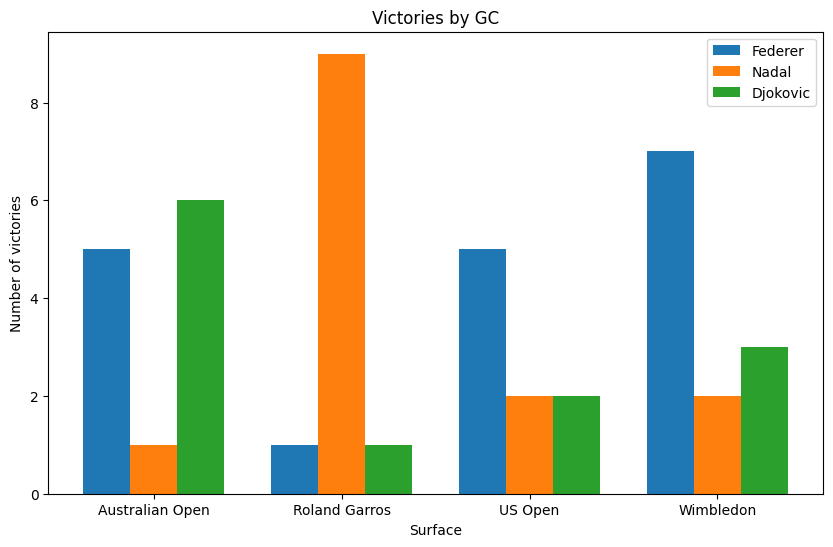

In [27]:
gc_federer = federer_win.loc[(federer_win['tourney_level'] == 'G') & (federer_win['round'] == 'F')]
gc_federer = gc_federer.groupby('tourney_name').size()

gc_nadal = nadal_win.loc[(nadal_win['tourney_level'] == 'G') & (nadal_win['round'] == 'F')]
gc_nadal= gc_nadal.groupby('tourney_name').size()

gc_djokovic = djokovic_win.loc[(djokovic_win['tourney_level'] == 'G') & (djokovic_win['round'] == 'F')]
gc_djokovic= gc_djokovic.groupby('tourney_name').size()

all_victory_per_gc = pd.concat([gc_federer, gc_nadal, gc_djokovic], axis=1)
all_victory_per_gc.columns = ['Federer', 'Nadal', 'Djokovic']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

index = np.arange(len(all_victory_per_gc))

for i, dataset in enumerate(all_victory_per_gc.columns):
    plt.bar(index + i * bar_width, all_victory_per_gc[dataset], bar_width, label=dataset)

plt.xlabel('Surface')
plt.ylabel('Number of victories')
plt.title('Victories by GC')
plt.xticks(index + bar_width, all_victory_per_gc.index)
plt.legend()

plt.show()

## Same comparison but with a top 10 player

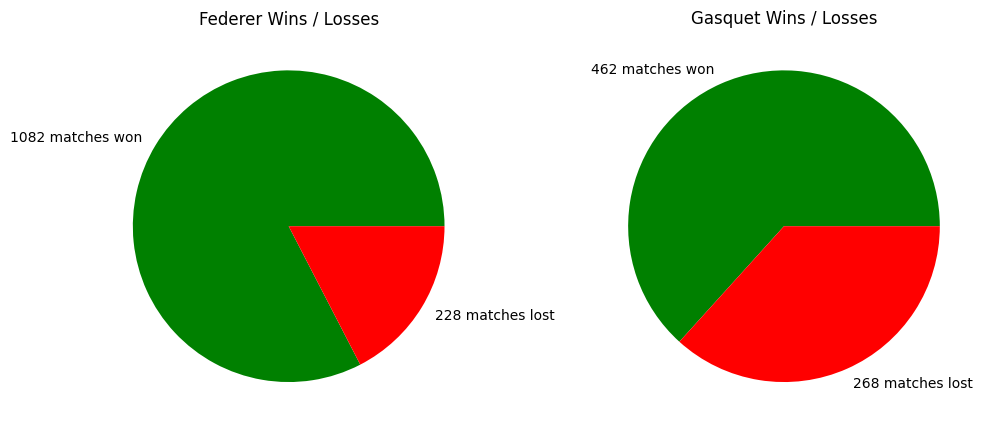

In [39]:
#Gasquet's wins and losses
gasquet_win = df_combined.loc[(df_combined['winner_name'] == 'Richard Gasquet')].copy()
gasquet_lose = df_combined.loc[(df_combined['loser_name'] == 'Richard Gasquet')].copy()


fig = plt.figure(figsize=(15, 5))

# Graphique 1
ax1 = fig.add_subplot(131)
ax1.set_title("Federer Wins / Losses")
ax1.pie([federer_win.count()[0], federer_lose.count()[0]],
        labels=[f'{federer_win.count()[0]} matches won', f'{federer_lose.count()[0]} matches lost'],
        textprops={'fontsize': 10},
        colors=['green', 'red'])

# Graphique 2
ax2 = fig.add_subplot(132)
ax2.set_title("Gasquet Wins / Losses")
ax2.pie([gasquet_win.count()[0], gasquet_lose.count()[0]],
        labels=[f'{gasquet_win.count()[0]} matches won', f'{gasquet_lose.count()[0]} matches lost'],
        textprops={'fontsize': 10},
        colors=['green', 'red'])

# Display adjustments
plt.tight_layout()

# Figure display
plt.show()

# Affichez le graphique
plt.show()



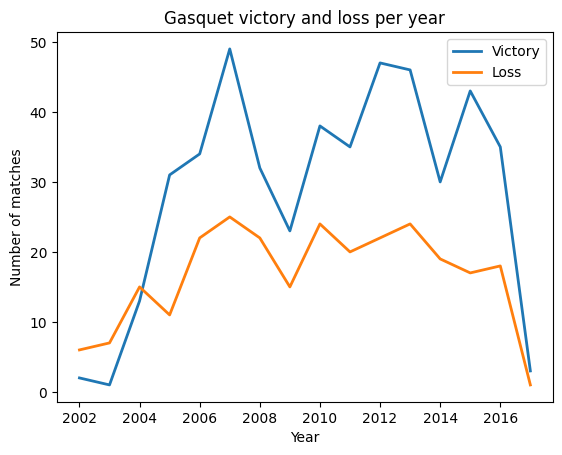

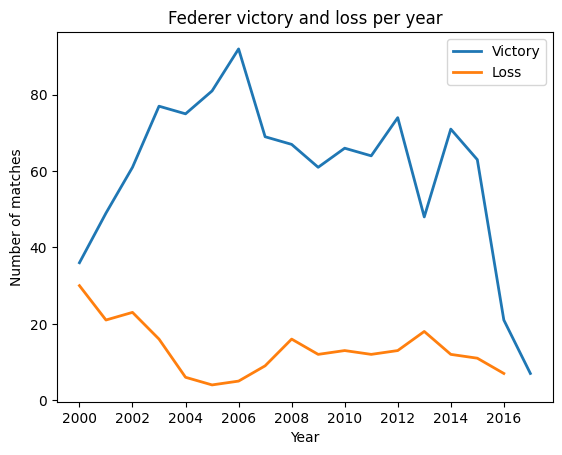

In [42]:
#Gasquet win / loss per year
gasquet_victory_per_year = gasquet_win.groupby('year').size()
gasquet_loss_per_year = gasquet_lose.groupby('year').size()


#Gasquet plot
fig, ax = plt.subplots()

ax.plot(gasquet_victory_per_year.index, gasquet_victory_per_year.values, linewidth=2.0, label = 'Victory')
ax.plot(gasquet_loss_per_year.index, gasquet_loss_per_year.values, linewidth=2.0, label = 'Loss')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('Number of matches')
ax.set_title('Gasquet victory and loss per year')

plt.legend()
plt.show()

#Federer plot
fig, ax = plt.subplots()

ax.plot(federer_victory_per_year.index, federer_victory_per_year.values, linewidth=2.0, label = 'Victory')
ax.plot(federer_loss_per_year.index, federer_loss_per_year.values, linewidth=2.0, label = 'Loss')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('Number of matches')
ax.set_title('Federer victory and loss per year')

plt.legend()
plt.show()

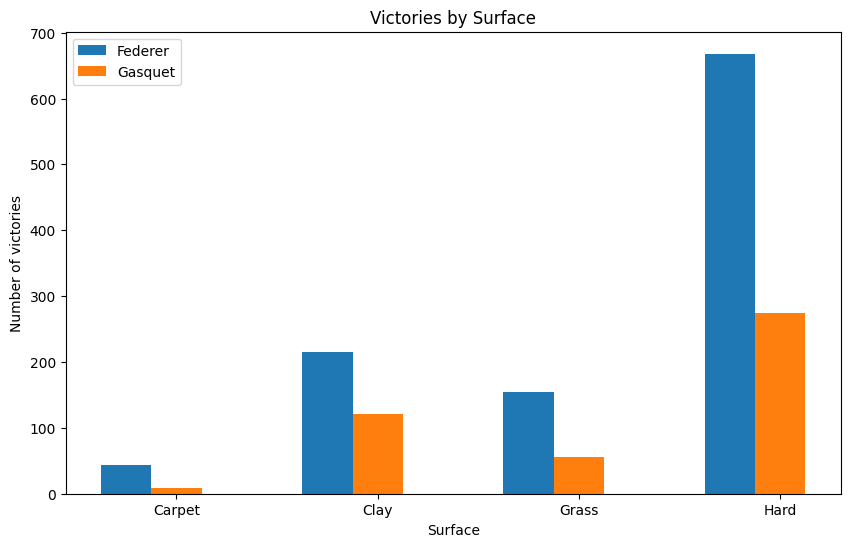

In [43]:
victory_per_surface_gasquet = gasquet_win.groupby('surface').size()

# Concatenate 2 df into one
all_victory_per_surface = pd.concat([victory_per_surface_federer, victory_per_surface_gasquet], axis=1)
all_victory_per_surface.columns = ['Federer', 'Gasquet']


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

index = np.arange(len(all_victory_per_surface))

# Pour chaque jeu de données, créez une barre groupée
for i, dataset in enumerate(all_victory_per_surface.columns):
    plt.bar(index + i * bar_width, all_victory_per_surface[dataset], bar_width, label=dataset)

plt.xlabel('Surface')
plt.ylabel('Number of victories')
plt.title('Victories by Surface')
plt.xticks(index + bar_width, all_victory_per_surface.index)
plt.legend()

plt.show()